In [1]:
! pip install ucimlrepo

from ucimlrepo import fetch_ucirepo

# fetch dataset
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697)

# data (as pandas dataframes)
X = predict_students_dropout_and_academic_success.data.features
y = predict_students_dropout_and_academic_success.data.targets

# metadata
print(predict_students_dropout_and_academic_success.metadata)

# variable information
print(predict_students_dropout_and_academic_success.variables)


{'uci_id': 697, 'name': "Predict Students' Dropout and Academic Success", 'repository_url': 'https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success', 'data_url': 'https://archive.ics.uci.edu/static/public/697/data.csv', 'abstract': "A dataset created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies.\nThe dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters. \nThe data is used to build classification models to predict students' dropout and academic sucess. The problem is formulated as a three category classification task, in which there is a strong imbalance towards one of the classes.", 'area': 'Social Sc

### 1. Distribution of the Target Variable

/tmp/ipython-input-3613414759.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=y, x='Target', palette='viridis')


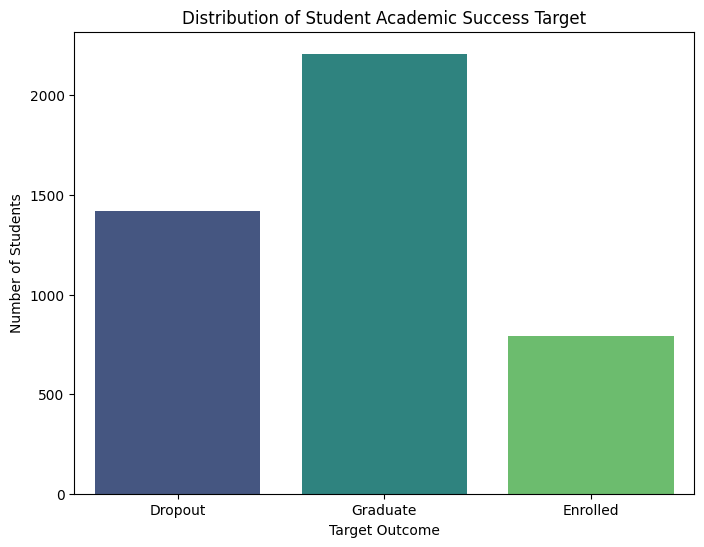

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(data=y, x='Target', palette='viridis')
plt.title('Distribution of Student Academic Success Target')
plt.xlabel('Target Outcome')
plt.ylabel('Number of Students')
plt.show()

### 2. Relationship between Key Features and Target Variable

First, let's combine the features `X` and the target `y` into a single DataFrame for easier plotting. Then, we can visualize the relationship between selected categorical and numerical features with the target variable.

In [7]:
import pandas as pd

df_combined = pd.concat([X, y], axis=1)
display(df_combined.head())

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


#### Categorical Features vs. Target

Let's visualize some key categorical features against the `Target` variable to see how they influence student outcomes. We'll start with 'Marital Status' and 'Gender'.

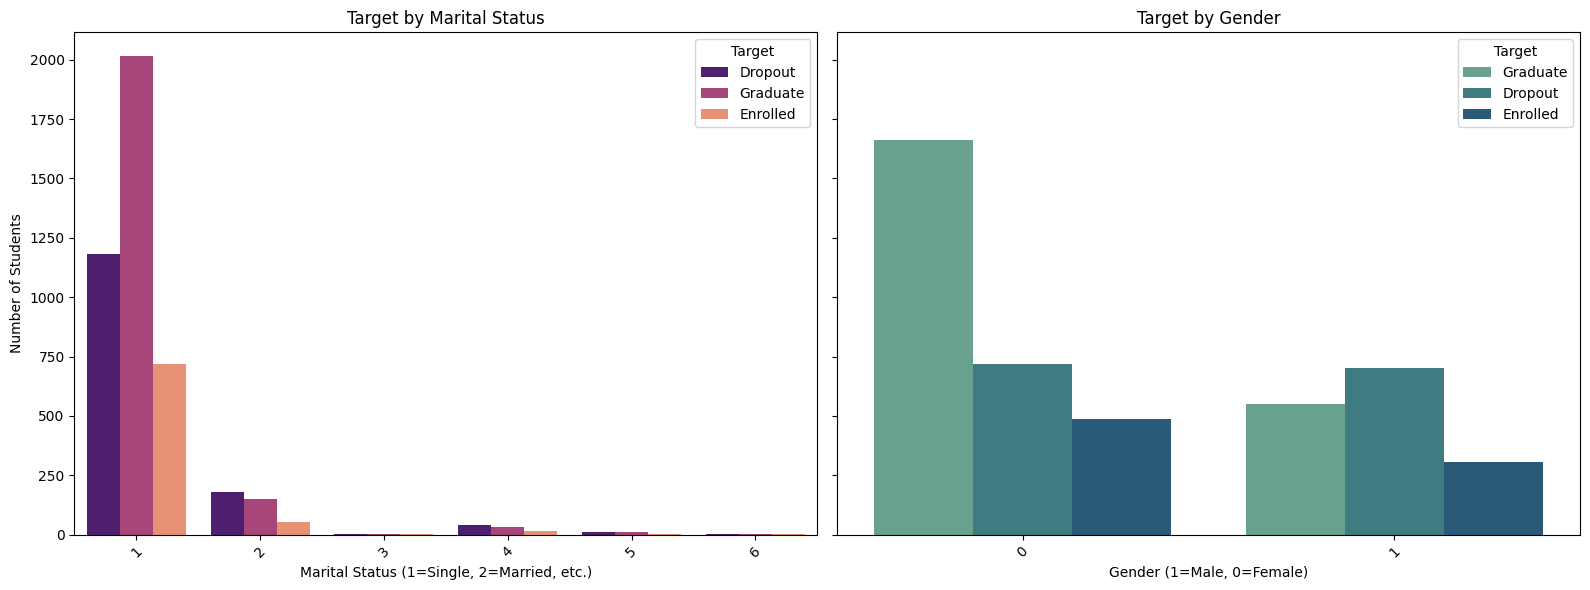

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

sns.countplot(data=df_combined, x='Marital Status', hue='Target', palette='magma', ax=axes[0])
axes[0].set_title('Target by Marital Status')
axes[0].set_xlabel('Marital Status (1=Single, 2=Married, etc.)')
axes[0].set_ylabel('Number of Students')
axes[0].tick_params(axis='x', rotation=45)

sns.countplot(data=df_combined, x='Gender', hue='Target', palette='crest', ax=axes[1])
axes[1].set_title('Target by Gender')
axes[1].set_xlabel('Gender (1=Male, 0=Female)')
axes[1].set_ylabel('Number of Students')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

#### Numerical Features vs. Target

Now, let's examine how some numerical features vary across the different target outcomes. We'll look at 'Age at enrollment' and 'Admission grade'.

/tmp/ipython-input-3180440667.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_combined, x='Target', y='Age at enrollment', palette='viridis', ax=axes[0])
/tmp/ipython-input-3180440667.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_combined, x='Target', y='Admission grade', palette='cividis', ax=axes[1])


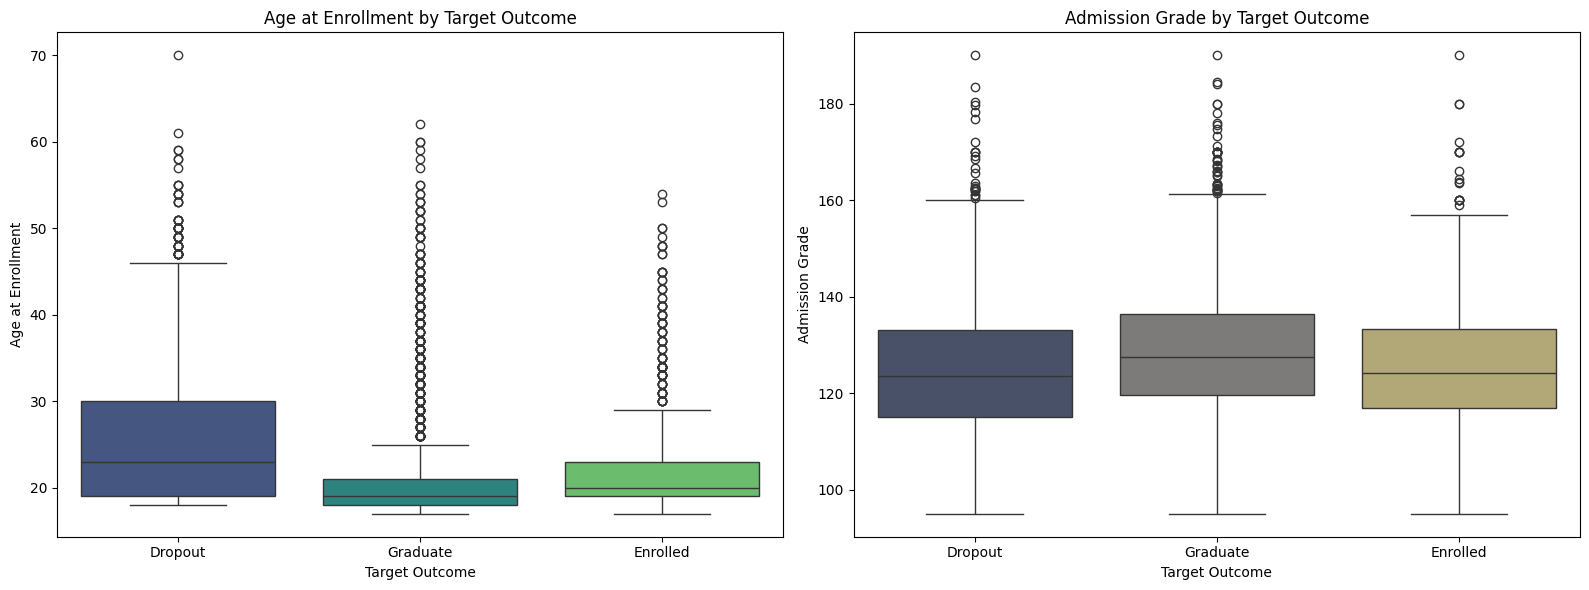

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(data=df_combined, x='Target', y='Age at enrollment', palette='viridis', ax=axes[0])
axes[0].set_title('Age at Enrollment by Target Outcome')
axes[0].set_xlabel('Target Outcome')
axes[0].set_ylabel('Age at Enrollment')

sns.boxplot(data=df_combined, x='Target', y='Admission grade', palette='cividis', ax=axes[1])
axes[1].set_title('Admission Grade by Target Outcome')
axes[1].set_xlabel('Target Outcome')
axes[1].set_ylabel('Admission Grade')

plt.tight_layout()
plt.show()

### 4. Correlation between Two Numerical Variables

Let's examine the correlation between 'Admission grade' and 'Curricular units 1st sem (grade)'. These two variables are likely to show a relationship, as a higher admission grade might lead to better performance in the first semester.

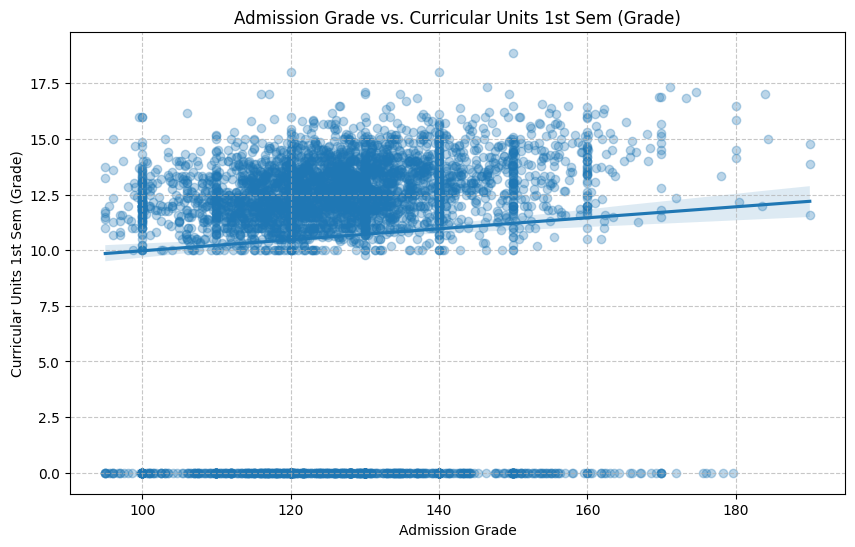


Pearson Correlation between Admission grade and Curricular units 1st sem (grade): 0.07


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=df_combined, x='Admission grade', y='Curricular units 1st sem (grade)', scatter_kws={'alpha':0.3})
plt.title('Admission Grade vs. Curricular Units 1st Sem (Grade)')
plt.xlabel('Admission Grade')
plt.ylabel('Curricular Units 1st Sem (Grade)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Calculate and print the Pearson correlation coefficient
correlation = df_combined['Admission grade'].corr(df_combined['Curricular units 1st sem (grade)'])
print(f"\nPearson Correlation between Admission grade and Curricular units 1st sem (grade): {correlation:.2f}")

### 5. Correlation Matrix

Let's calculate and visualize the correlation matrix for all numerical features in the combined dataset (`df_combined`). This will give us a comprehensive view of the linear relationships between all pairs of numerical variables.

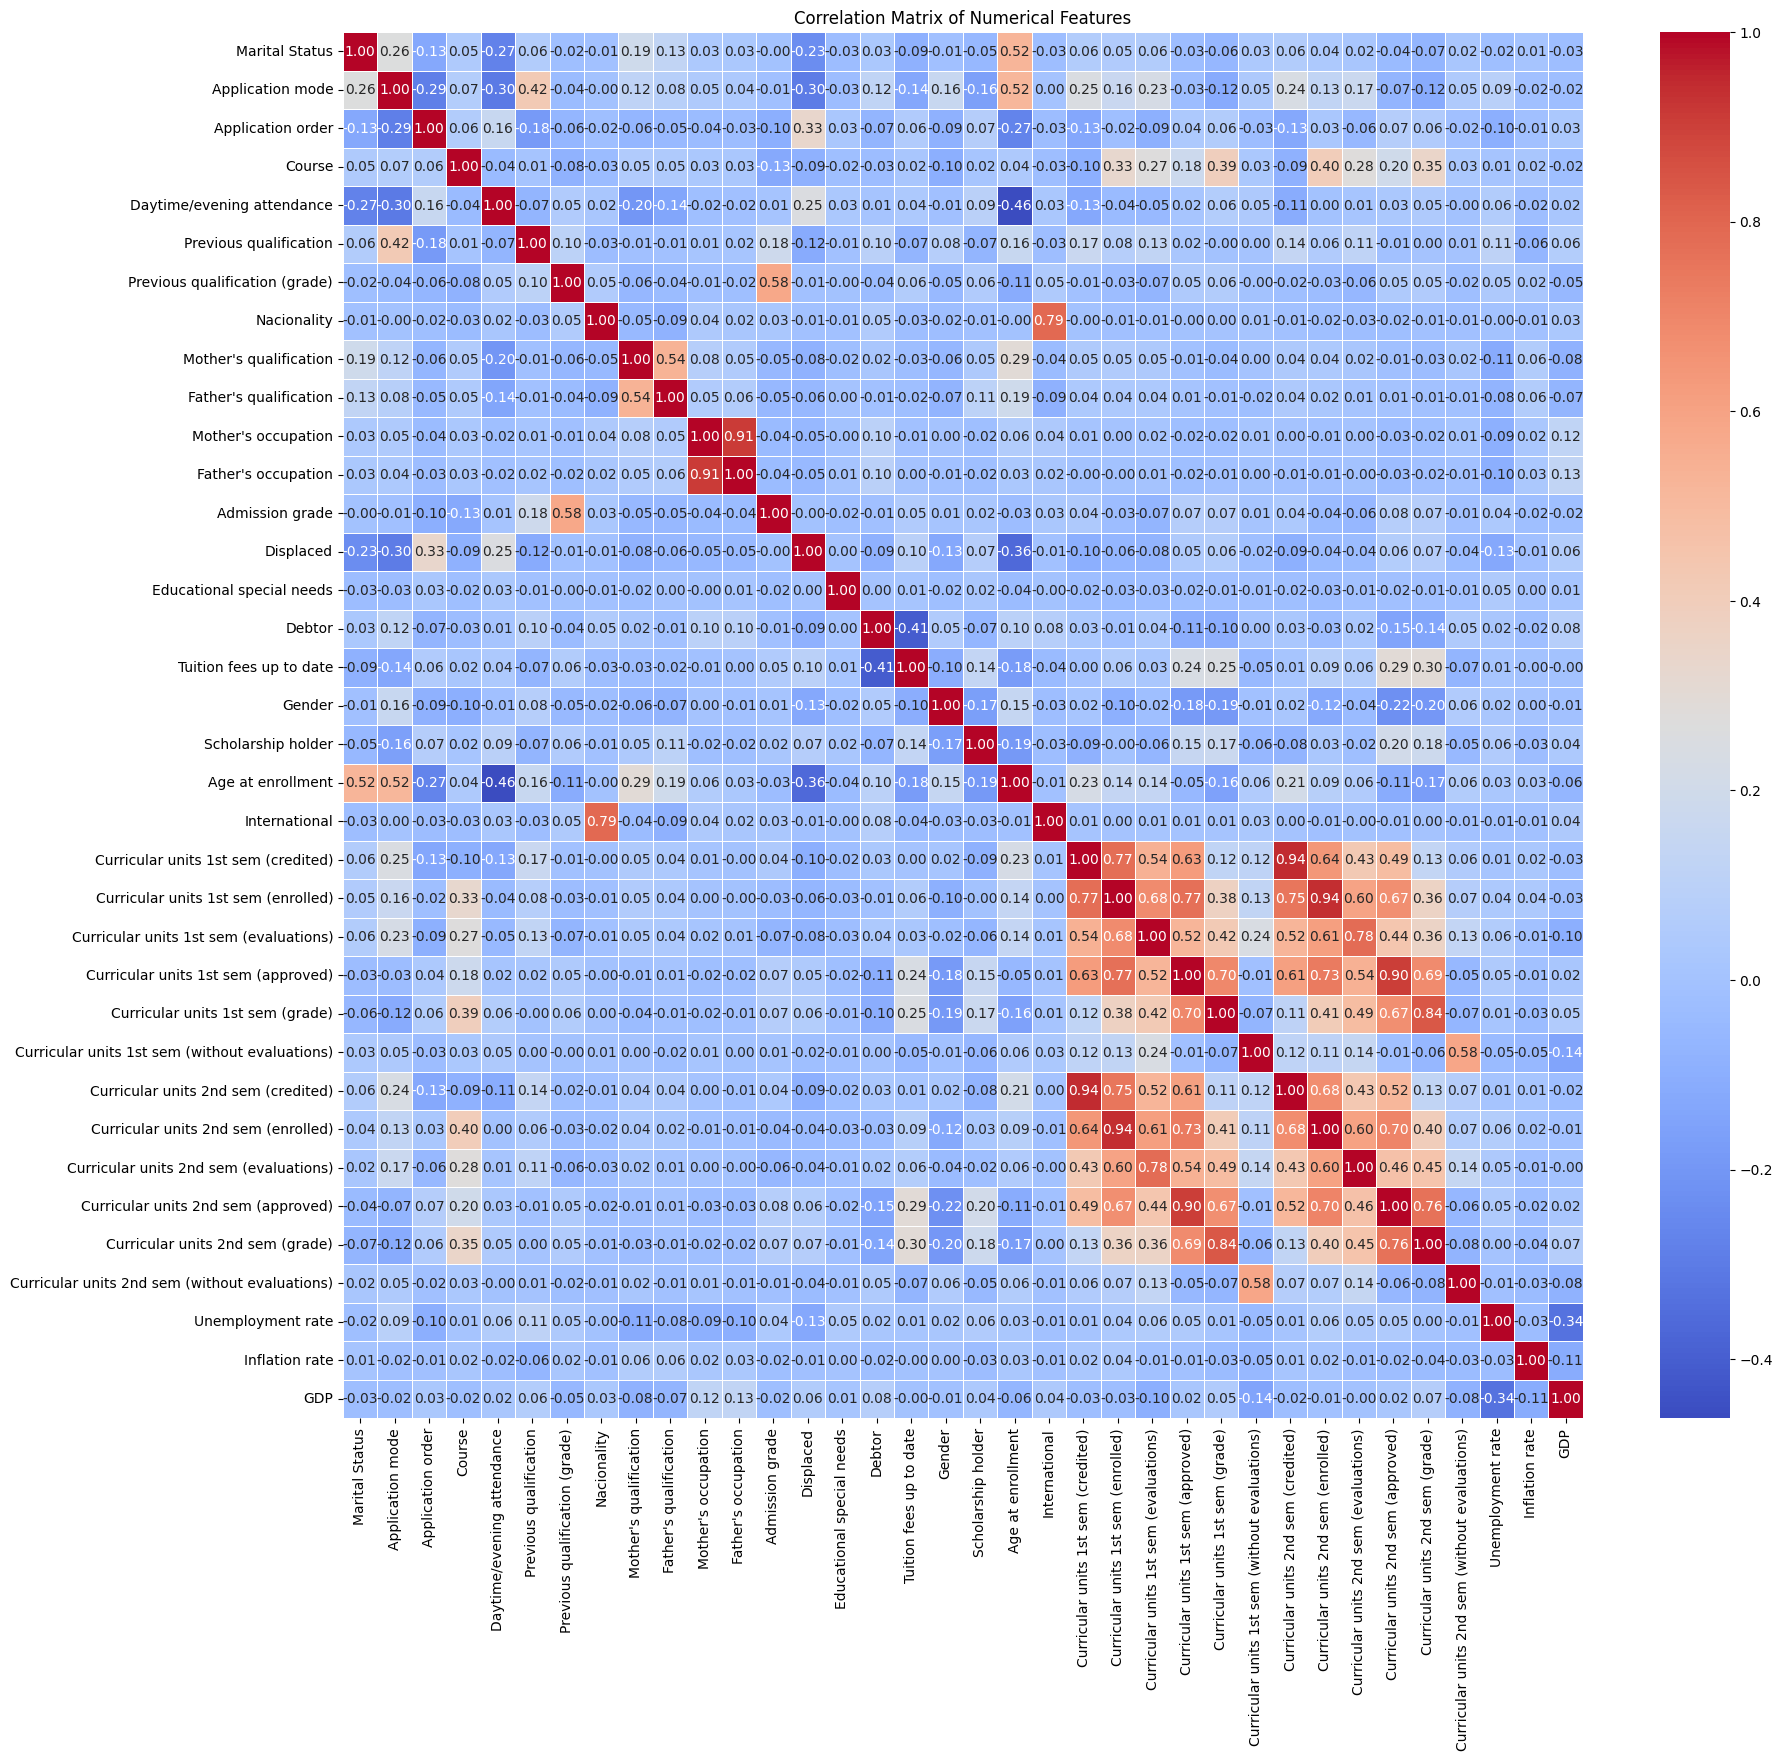


Correlation Matrix (Numerical Features):


,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
Marital Status,1.000000,0.264006,-0.125854,0.046365,-0.274939,0.062529,-0.022406,-0.008843,0.193163,0.130353,...,0.034711,0.062831,0.039026,0.022784,-0.043739,-0.071506,0.020426,-0.020338,0.008761,-0.027003
Application mode,0.264006,1.000000,-0.286357,0.065385,-0.304092,0.422411,-0.039020,-0.000661,0.118974,0.083276,...,0.045828,0.238445,0.130046,0.167872,-0.071526,-0.115424,0.047983,0.089080,-0.016375,-0.022743
Application order,-0.125854,-0.286357,1.000000,0.059507,0.158657,-0.184315,-0.064484,-0.022416,-0.064956,-0.050288,...,-0.031699,-0.125815,0.028878,-0.055089,0.071793,0.055517,-0.015757,-0.098419,-0.011133,0.030201
Course,0.046365,0.065385,0.059507,1.000000,-0.043151,0.006654,-0.081013,-0.033923,0.054543,0.050724,...,0.034514,-0.089817,0.401539,0.278797,0.198032,0.348728,0.030816,0.007153,0.017710,-0.020265
Daytime/evening attendance,-0.274939,-0.304092,0.158657,-0.043151,1.000000,-0.071871,0.052597,0.018530,-0.204767,-0.139894,...,0.045630,-0.111953,0.000371,0.014610,0.034022,0.050493,-0.004229,0.061974,-0.024043,0.022929
Previous qualification,0.062529,0.422411,-0.184315,0.006654,-0.071871,1.000000,0.104072,-0.029214,-0.013190,-0.006614,...,0.002887,0.143031,0.056179,0.114850,-0.008632,0.000942,0.005102,0.111958,-0.063736,0.064069
Previous qualification (grade),-0.022406,-0.039020,-0.064484,-0.081013,0.052597,0.104072,1.000000,0.054088,-0.060670,-0.035234,...,-0.003926,-0.018489,-0.031649,-0.061355,0.050263,0.053239,-0.019015,0.045222,0.018710,-0.052620
Nacionality,-0.008843,-0.000661,-0.022416,-0.033923,0.018530,-0.029214,0.054088,1.000000,-0.049946,-0.085282,...,0.009145,-0.007278,-0.020113,-0.025721,-0.017880,-0.008497,-0.014041,-0.000651,-0.008922,0.034478
Mother's qualification,0.193163,0.118974,-0.064956,0.054543,-0.204767,-0.013190,-0.060670,-0.049946,1.000000,0.535140,...,0.003183,0.042771,0.035150,0.021033,-0.014858,-0.031175,0.021305,-0.114351,0.059441,-0.083657
Father's qualification,0.130353,0.083276,-0.050288,0.050724,-0.139894,-0.006614,-0.035234,-0.085282,0.535140,1.000000,...,-0.017333,0.042666,0.024380,0.009514,0.005285,-0.008083,-0.007430,-0.077905,0.057633,-0.071610


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix for numerical columns only
# The 'Target' column is categorical, so we should exclude it for numerical correlation
numerical_df = df_combined.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(20, 18)) # Adjust figure size for better readability of a large matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Display the correlation matrix as a DataFrame
print("\nCorrelation Matrix (Numerical Features):")
display(correlation_matrix)

### 3. Descriptive Statistics Overview

Let's get a statistical summary of the numerical features in the dataset (`X`) and check the distribution of the target variable (`y`).

In [10]:
print("\nDescriptive Statistics for Features (X):")
display(X.describe())


Descriptive Statistics for Features (X):


,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [11]:
print("\nValue Counts for Target Variable (y):")
display(y['Target'].value_counts())


Value Counts for Target Variable (y):


,count
Target,
Graduate,2209
Dropout,1421
Enrolled,794
